In [2]:
#Install required libraries
!pip install yfinance pandas numpy matplotlib scikit-learn --quiet

#Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Load historical stock data
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2023-12-31"

data = yf.download(ticker, start=start_date, end=end_date)
#Display first 5 rows
print(data.head())


C:\Users\hp\AppData\Local\Temp\ipykernel_22080\363043546.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620827  72.681274  71.373203  71.627077  135480400
2020-01-03  71.914818  72.676447  71.689957  71.847118  146322800
2020-01-06  72.487839  72.526526  70.783241  71.034702  118387200
2020-01-07  72.146935  72.753816  71.926907  72.497522  108872000
2020-01-08  73.307510  73.609745  71.849533  71.849533  132079200


In [4]:
print(data.isnull().sum())

data = data.dropna()
data['Next Close'] = data['Close'].shift(-1)
data = data[:-1]

#Display the modified data
print(data.tail())

Price       Ticker
Close       AAPL      0
High        AAPL      0
Low         AAPL      0
Open        AAPL      0
Volume      AAPL      0
Next Close            0
dtype: int64
Price            Close        High         Low        Open    Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
Date                                                                   
2023-12-20  193.413605  196.242876  193.413605  195.468548  52242800   
2023-12-21  193.264679  195.647240  192.093265  194.674369  46482500   
2023-12-22  192.192535  193.989374  191.567111  193.761035  37122800   
2023-12-26  191.646561  192.480450  191.428159  192.202487  28919300   
2023-12-27  191.745819  192.093281  189.700797  191.090629  48087700   

Price      Next Close  
Ticker                 
Date                   
2023-12-20        NaN  
2023-12-21        NaN  
2023-12-22        NaN  
2023-12-26        NaN  
2023-12-27        NaN  


In [ ]:

#Cleaning and preparing data

data['Next Close'] = data['Close'].shift(-1)  # Tomorrow's close
data = data[:-1]  # Remove last row (NaN in 'Next Close')

# Defining features and target
X = data[['Open', 'High', 'Low', 'Volume']]
Y = data['Next Close']

#Train-test split (no shuffling for time-series)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=False
)

In [7]:
#Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

#Training Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


Linear Regression R² Score: 0.9579
Random Forest R² Score: 0.0837
Linear Regression MSE: 4.98
Random Forest MSE: 108.31


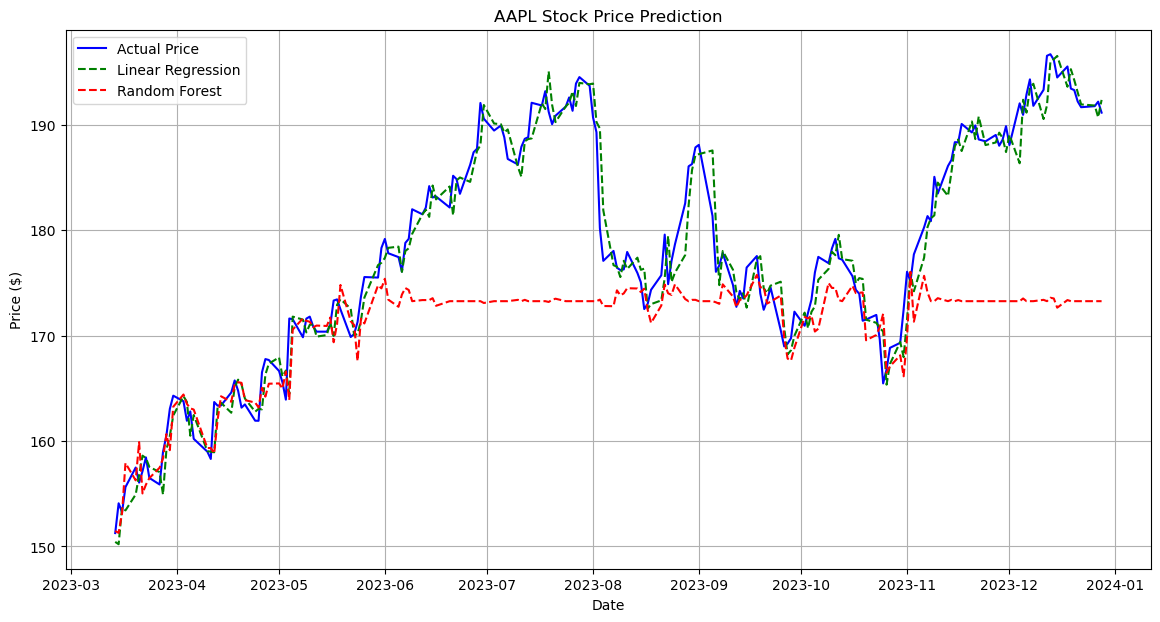


 Predicted Next Day Closing Price for AAPL: $173.25


In [8]:


# 📈 Evaluating models
lr_r2 = r2_score(y_test, lr_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

print(f"Linear Regression R² Score: {lr_r2:.4f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")
print(f"Linear Regression MSE: {lr_mse:.2f}")
print(f"Random Forest MSE: {rf_mse:.2f}")

# 📊 Plot actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, lr_predictions, label='Linear Regression', color='green', linestyle='--')
plt.plot(y_test.index, rf_predictions, label='Random Forest', color='red', linestyle='--')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

#Predict next day's closing price
latest_data = features.iloc[[-1]]  # Last row (double brackets for DataFrame format)

if latest_data.shape[1] == rf_model.n_features_in_:
    predicted_next_close = rf_model.predict(latest_data)[0]
    print(f"\n Predicted Next Day Closing Price for {ticker}: ${predicted_next_close:.2f}")
else:
    print(" Feature mismatch – check preprocessing.")
